   iCell  LANDIS_BQ  LANDIS_B  Lantrendr01  WoodsHole 
0      0    3579300   3579300      3285000     2250000
1      1    3579300   3579300      6930000     7065000
2      2    3019500   3019500      5310000     5400000
3      3    3019500   3019500      5130000     4950000
4      4    3019500   3019500      5085000     3735000
               iCell     LANDIS_BQ      LANDIS_B   Lantrendr01    WoodsHole 
count  920577.000000  9.205770e+05  9.205770e+05  9.205770e+05  9.205770e+05
mean   460288.000000  3.134540e+06  3.133985e+06  2.908502e+06  3.013660e+06
std    265747.833716  1.537445e+06  1.535717e+06  1.440536e+06  1.636143e+06
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
10%     92057.600000  8.460000e+05  8.460000e+05  1.080000e+06  1.440000e+06
25%    230144.000000  2.775600e+06  2.775600e+06  1.845000e+06  1.890000e+06
50%    460288.000000  3.283200e+06  3.283200e+06  2.790000e+06  2.835000e+06
75%    690432.000000  3.783600e+06  3.783600e+06  3.91

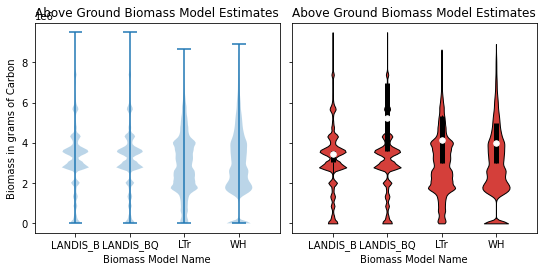

In [1]:
%run biomassviolins2.py

In [2]:
df.keys()

Index(['iCell', 'LANDIS_BQ', 'LANDIS_B', 'Lantrendr01', 'WoodsHole '], dtype='object')

In [3]:
df_ltr_00= pd.read_csv('conus_biomass_ard_tile_h1109_11_k2_ltr00.asc', skiprows=6, header=None, sep=' ') #na_filter=False to remove)
df_ltr_00.head()

,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,71,154,116,113,113,106,108,108,99,103,...,2,2,3,11,8,16,26,7,2,NaN
1,52,114,112,115,118,118,112,107,88,92,...,2,5,27,29,33,35,25,8,1,NaN
2,101,102,102,118,119,116,118,112,102,82,...,14,36,46,48,57,63,38,31,1,NaN
3,105,99,100,106,118,117,116,123,118,110,...,22,36,39,49,69,80,59,38,25,NaN
4,65,79,99,111,112,107,112,113,116,112,...,5,18,23,32,38,48,46,38,37,NaN


In [4]:
df_ltr_00.shape

(1239, 744)

In [5]:
data_array_1=df_ltr_00.values[:, 0:-1]
data_array_1.shape


(1239, 743)

In [6]:
type(data_array_1)

numpy.ndarray

In [7]:
ltr_00_np = data_array_1.reshape(-1,1, order='C')
ltr_00_np.shape

(920577, 1)

In [8]:
df_ltr_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Columns: 744 entries, 0 to 743
dtypes: float64(1), int64(743)
memory usage: 7.0 MB


In [9]:
df['Lantrendr00']=ltr_00_np
df.head()

,iCell,LANDIS_BQ,LANDIS_B,Lantrendr01,WoodsHole,Lantrendr00
0,0,3579300,3579300,3285000,2250000,71.0
1,1,3579300,3579300,6930000,7065000,154.0
2,2,3019500,3019500,5310000,5400000,116.0
3,3,3019500,3019500,5130000,4950000,113.0
4,4,3019500,3019500,5085000,3735000,113.0


In [10]:
sum(df['Lantrendr00'])*.09

5442819.75

In [11]:
#To rescale biomass checking conversion to 
LT_totkg = sum(df['Lantrendr00'])*.09
((LT_totkg*1000)/2)*100

272140987500.0

In [12]:
df['Lantrendr00']=df['Lantrendr00'].transform(lambda x:int(x*45000))
df

,iCell,LANDIS_BQ,LANDIS_B,Lantrendr01,WoodsHole,Lantrendr00
0,0,3579300,3579300,3285000,2250000,3195000
1,1,3579300,3579300,6930000,7065000,6930000
2,2,3019500,3019500,5310000,5400000,5220000
3,3,3019500,3019500,5130000,4950000,5085000
4,4,3019500,3019500,5085000,3735000,5085000
...,...,...,...,...,...,...
920572,920572,3744000,3744000,4050000,4590000,4095000
920573,920573,2785500,2785500,2475000,2295000,2430000
920574,920574,846000,846000,2250000,2070000,2295000
920575,920575,5775300,5775300,2610000,2610000,2565000


In [13]:
sum(df['Lantrendr00'])

2721409875000

In [14]:
df['LANDIS_BQ'].describe()

count    9.205770e+05
mean     3.134540e+06
std      1.537445e+06
min      0.000000e+00
25%      2.775600e+06
50%      3.283200e+06
75%      3.783600e+06
max      9.498600e+06
Name: LANDIS_BQ, dtype: float64

In [15]:
from scipy import stats

In [16]:
stats.describe(df['LANDIS_BQ'])

DescribeResult(nobs=920577, minmax=(0, 9498600), mean=3134540.3951000297, variance=2363736233012.8047, skewness=0.034932082112011924, kurtosis=0.6355954420463803)

In [17]:
stats.describe(df['Lantrendr01'])

DescribeResult(nobs=920577, minmax=(0, 8640000), mean=2908502.3903486617, variance=2075143631783.7854, skewness=0.2432987770130612, kurtosis=-0.2884281158558615)

In [18]:
stats.describe(df['Lantrendr00'])

DescribeResult(nobs=920577, minmax=(0, 8640000), mean=2956200.1603342253, variance=2068794285007.274, skewness=0.22080636618853003, kurtosis=-0.3085186449137258)

In [19]:
df.keys()

Index(['iCell', 'LANDIS_BQ', 'LANDIS_B', 'Lantrendr01', 'WoodsHole ',
       'Lantrendr00'],
      dtype='object')

In [21]:
# percentile list
perc =[.10, .25, .50, .75, .90]

In [24]:
df.drop(columns = {'iCell'}).reindex(columns={'LANDIS_BQ', 'LANDIS_B','Lantrendr01', 'Lantrendr00', 'WoodsHole '
       }).rename(columns = {'Lantrendr01':'Landtrendr01', 'Lantrendr00':'Landtrendr00'})

,LANDIS_B,Landtrendr01,Landtrendr00,WoodsHole,LANDIS_BQ
0,3579300,3285000,3195000,2250000,3579300
1,3579300,6930000,6930000,7065000,3579300
2,3019500,5310000,5220000,5400000,3019500
3,3019500,5130000,5085000,4950000,3019500
4,3019500,5085000,5085000,3735000,3019500
...,...,...,...,...,...
920572,3744000,4050000,4095000,4590000,3744000
920573,2785500,2475000,2430000,2295000,2785500
920574,846000,2250000,2295000,2070000,846000
920575,5775300,2610000,2565000,2610000,5775300


In [22]:
df.describe(percentiles=perc).drop(columns = {'iCell'}).reindex(columns={'LANDIS_BQ', 'LANDIS_B','Lantrendr01', 'Lantrendr00', 'WoodsHole '
       }).rename(columns = {'Lantrendr01':'Landtrendr01', 'Lantrendr00':'Landtrendr00'})

,LANDIS_B,Landtrendr01,Landtrendr00,WoodsHole,LANDIS_BQ
count,9.205770e+05,9.205770e+05,9.205770e+05,9.205770e+05,9.205770e+05
mean,3.133985e+06,2.908502e+06,2.956200e+06,3.013660e+06,3.134540e+06
std,1.535717e+06,1.440536e+06,1.438330e+06,1.636143e+06,1.537445e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,8.460000e+05,1.080000e+06,1.170000e+06,1.440000e+06,8.460000e+05
25%,2.775600e+06,1.845000e+06,1.890000e+06,1.890000e+06,2.775600e+06
50%,3.283200e+06,2.790000e+06,2.880000e+06,2.835000e+06,3.283200e+06
75%,3.783600e+06,3.915000e+06,3.960000e+06,4.050000e+06,3.783600e+06
90%,4.779900e+06,4.815000e+06,4.860000e+06,5.175000e+06,4.779900e+06
max,9.498600e+06,8.640000e+06,8.640000e+06,8.910000e+06,9.498600e+06


In [25]:
df.describe(percentiles=perc).drop(columns = {'iCell'}).rename(columns = {'Lantrendr01':'Landtrendr01', 'Lantrendr00':'Landtrendr00'})

,LANDIS_BQ,LANDIS_B,Landtrendr01,WoodsHole,Landtrendr00
count,9.205770e+05,9.205770e+05,9.205770e+05,9.205770e+05,9.205770e+05
mean,3.134540e+06,3.133985e+06,2.908502e+06,3.013660e+06,2.956200e+06
std,1.537445e+06,1.535717e+06,1.440536e+06,1.636143e+06,1.438330e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,8.460000e+05,8.460000e+05,1.080000e+06,1.440000e+06,1.170000e+06
25%,2.775600e+06,2.775600e+06,1.845000e+06,1.890000e+06,1.890000e+06
50%,3.283200e+06,3.283200e+06,2.790000e+06,2.835000e+06,2.880000e+06
75%,3.783600e+06,3.783600e+06,3.915000e+06,4.050000e+06,3.960000e+06
90%,4.779900e+06,4.779900e+06,4.815000e+06,5.175000e+06,4.860000e+06
max,9.498600e+06,9.498600e+06,8.640000e+06,8.910000e+06,8.640000e+06


In [27]:
df_2 = df.drop(columns = {'iCell'}).rename(columns = {'Lantrendr01':'Landtrendr01', 'Lantrendr00':'Landtrendr00'})

In [28]:
#df_2.to_csv('071122NHFAOI_Complete_Biomass_Compare.csv')

In [29]:
from scipy import stats

In [30]:
df_2.head()

,LANDIS_BQ,LANDIS_B,Landtrendr01,WoodsHole,Landtrendr00
0,3579300,3579300,3285000,2250000,3195000
1,3579300,3579300,6930000,7065000,6930000
2,3019500,3019500,5310000,5400000,5220000
3,3019500,3019500,5130000,4950000,5085000
4,3019500,3019500,5085000,3735000,5085000


In [31]:
k2, p =stats.normaltest(df_2)

In [32]:
alpha = 0.05

In [33]:
for stat in p:
   print("p = {:g}".format(stat))

p = 0
p = 0
p = 0
p = 0
p = 0


In [36]:
#We cannot use the Pearson R correlation because x doesn't come from a normal distribution
for stat in p:
    print("p = {:g}".format(stat))
    if stat < alpha: # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected
p = 0
The null hypothesis can be rejected
p = 0
The null hypothesis can be rejected
p = 0
The null hypothesis can be rejected
p = 0
The null hypothesis can be rejected


In [38]:
import seaborn as sns

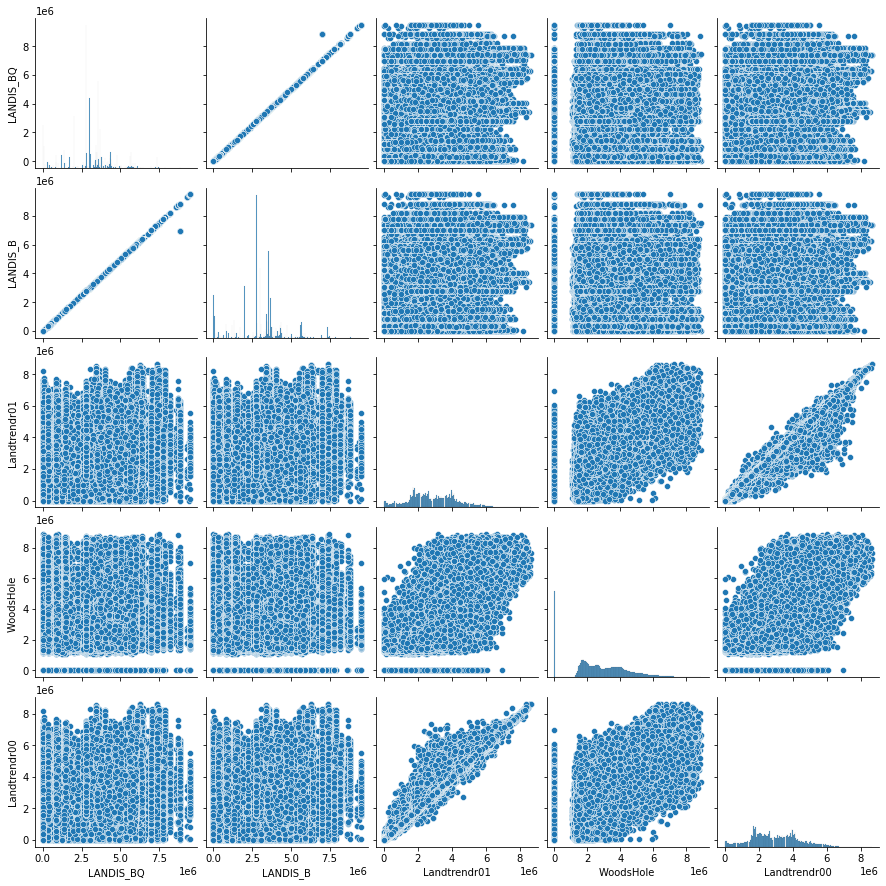

In [39]:
sns.pairplot(df_2)

In [40]:
data_array=df_2.values[:, 0:6]
data_array.shape

(920577, 5)

In [41]:
lbq = data_array[:,0];
lb = data_array[:,1];
ltr_01 = data_array[:,2];
wh = data_array[:,3];
ltr_00 = data_array[:,4];

In [43]:
#scaled _s for each biomass model 
lbq_s = lbq/10**6;
lb_s =lb/10**6;
wh_s = wh/10**6; 
ltr_01_s = ltr_01/10**6;
ltr_00_s = ltr_00/10**6;

In [44]:
stats.f_oneway(lbq_s, lb_s, ltr_00_s,ltr_01_s, wh_s)


F_onewayResult(statistic=4208.362313429524, pvalue=0.0)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x1=np.cumsum(wh_s)
y1 = stats.rankdata(x1)/(len(wh_s)+1)*2 -1
y1=np.arctanh(y1)
print(np.min(y1), np.max(y1))


-6.866377963171216 6.866377963171216


In [50]:
x2=np.cumsum(ltr_01_s)
y2 = stats.rankdata(x2)/(len(ltr_01_s)+1)*2 -1
y2=np.arctanh(y2)
print(np.min(y2), np.max(y2))


-6.866377963171216 6.866377963171216


In [54]:
x3=np.cumsum(ltr_00_s)
y3 = stats.rankdata(x3)/(len(ltr_00_s)+1)*2 -1
y3=np.arctanh(y3)
print(np.min(y3), np.max(y3))

-6.866377963171216 6.866377963171216


In [55]:
x4=np.cumsum(lbq_s)
y4 = stats.rankdata(x4)/(len(lbq_s)+1)*2 -1
y4=np.arctanh(y4)
print(np.min(y4), np.max(y4))

-6.866377963171216 6.866377963171216


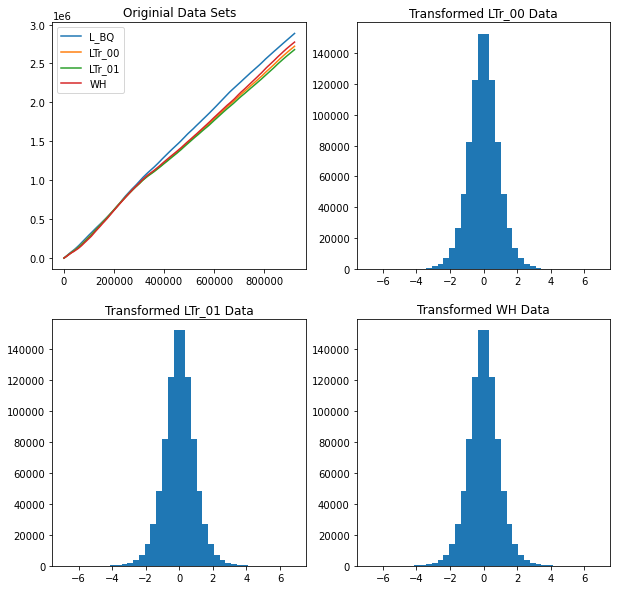

In [59]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(x4)
ax[0,0].plot(x3)
ax[0,0].plot(x2)
ax[0,0].plot(x1)
ax[0,0].set_title('Originial Data Sets')
ax[0,0].legend(['L_BQ', 'LTr_00', 'LTr_01', 'WH'])
ax[0,1].hist(y3, bins=40)
ax[0,1].set_title('Transformed LTr_00 Data')
ax[1,0].hist(y2,bins=40)
ax[1,0].set_title('Transformed LTr_01 Data')
ax[1,1].hist(y1,bins=40)
ax[1,1].set_title('Transformed WH Data')
plt.show()


In [77]:
stats.f_oneway(y4,y3, y2, y1) 

F_onewayResult(statistic=1.1746097702245626e-08, pvalue=0.999999999998216)

In [76]:
stats.f_oneway(y4, y2, y1) 

F_onewayResult(statistic=1.550102961679229e-08, pvalue=0.9999999843627166)

In [61]:
stats.f_oneway(y4,y3) 

F_onewayResult(statistic=2.176225931852127e-11, pvalue=1.0)

In [62]:
stats.f_oneway(y4, y2) 

F_onewayResult(statistic=2.1762696676407953e-11, pvalue=1.0)

In [63]:
stats.f_oneway(y4, y1) 

F_onewayResult(statistic=2.252957226853106e-08, pvalue=0.9998803572794921)

In [64]:
stats.ttest_ind(y4, y3)

Ttest_indResult(statistic=4.6650041587222915e-06, pvalue=0.9999962778657111)

In [65]:
stats.ttest_ind(y4, y2)

Ttest_indResult(statistic=4.665050320978575e-06, pvalue=0.9999962778288789)

In [66]:
stats.ttest_ind(y4, y1)

Ttest_indResult(statistic=-0.00015009854171819912, pvalue=0.9998802387076755)

In [67]:
stats.pearsonr(y4, y3)

(0.9999999959248805, 0.0)

In [68]:
stats.pearsonr(y4, y2)

(0.999999995924611, 0.0)

In [69]:
stats.pearsonr(y4, y1)

(0.9999998750301262, 0.0)

In [70]:
stats.ttest_rel(y4,y3)

Ttest_relResult(statistic=0.07307718788102113, pvalue=0.941744710423461)

In [71]:
stats.ttest_rel(y4,y2)

Ttest_relResult(statistic=0.07307549514974511, pvalue=0.9417460574258366)

In [72]:
stats.ttest_rel(y4,y1)

Ttest_relResult(statistic=-0.4245931393247337, pvalue=0.6711333944202982)

In [73]:
np.cov(y4,y3)

array([[0.82240275, 0.82240278],
       [0.82240278, 0.82240281]])

In [74]:
np.cov(y4, y2)

array([[0.82240275, 0.82240278],
       [0.82240278, 0.82240281]])

In [75]:
np.cov(y4,y1)

array([[0.82240275, 0.82240184],
       [0.82240184, 0.82240114]])

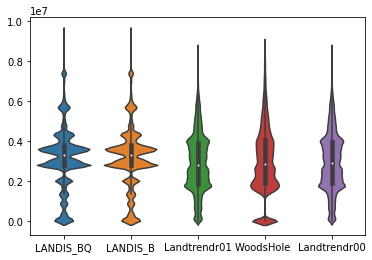

In [39]:
ax5 = sns.violinplot(
        data = df.drop(columns={'iCell'}).rename(columns = {'Lantrendr01':'Landtrendr01', 'Lantrendr00':'Landtrendr00'}), showmeans=False, showmedians=True,
        showextrema=True)


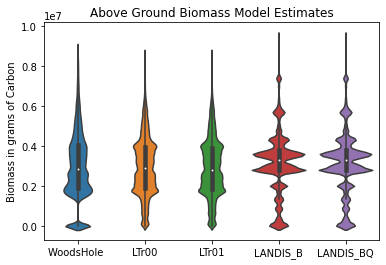

In [44]:
ax6 = sns.violinplot(
        data = df.drop(columns={'iCell'}).reindex(columns={'LANDIS_BQ', 'LANDIS_B','Lantrendr01', 'Lantrendr00', 'WoodsHole '
       }).rename(columns = {'Lantrendr01':'LTr01', 'Lantrendr00':'LTr00'}) , showmeans=False, showmedians=False,
        showextrema=False)
ax6.set_title('Above Ground Biomass Model Estimates')
ax6.set_ylabel('Biomass in grams of Carbon')
#ax3.violinplot(data_array)
#This is for a smoother image with those values
# set style for the axes
#labels = ['LANDIS_B', 'LANDIS_BQ', 'LTr', 'WH']
#for label in [ax3]:
#ax3.set_xlabel(labels)

#plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()
plt.close()

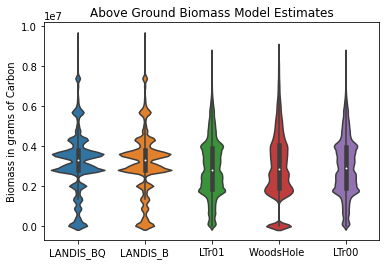

In [45]:
ax3 = sns.violinplot(
        data = df.drop(columns={'iCell'}).rename(columns = {'Lantrendr01':'LTr01', 'Lantrendr00':'LTr00'}), showmeans=False, showmedians=False,
        showextrema=False)
ax3.set_title('Above Ground Biomass Model Estimates')
ax3.set_ylabel('Biomass in grams of Carbon')
#ax3.violinplot(data_array)
#This is for a smoother image with those values
# set style for the axes
#labels = ['LANDIS_B', 'LANDIS_BQ', 'LTr', 'WH']
#for label in [ax3]:
#ax3.set_xlabel(labels)

#plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()
plt.close()

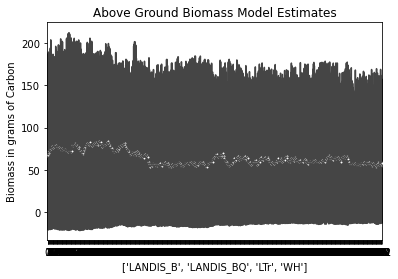

In [22]:
ax3 = sns.violinplot(
        data = data_array, showmeans=False, showmedians=False,
        showextrema=False)
ax3.set_title('Above Ground Biomass Model Estimates')
ax3.set_ylabel('Biomass in grams of Carbon')
#ax3.violinplot(data_array)
#This is for a smoother image with those values
# set style for the axes
labels = ['LANDIS_B', 'LANDIS_BQ', 'LTr', 'WH']
for label in [ax3]:
    ax3.set_xlabel(labels)

#plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()
plt.close()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

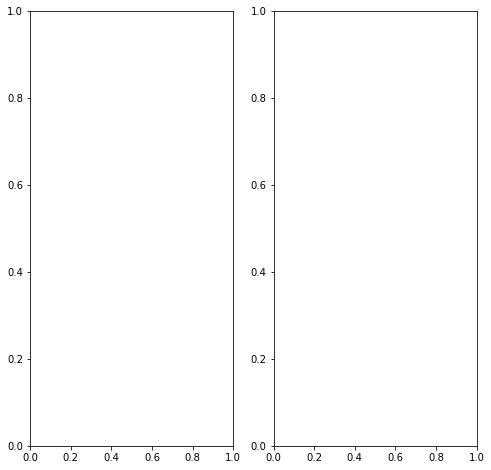

In [23]:
fig, ax = plt.subplots(1,2,figsize=(8,8))
ax[0,0] = ax3

AttributeError: 'AxesSubplot' object has no attribute 'fig'

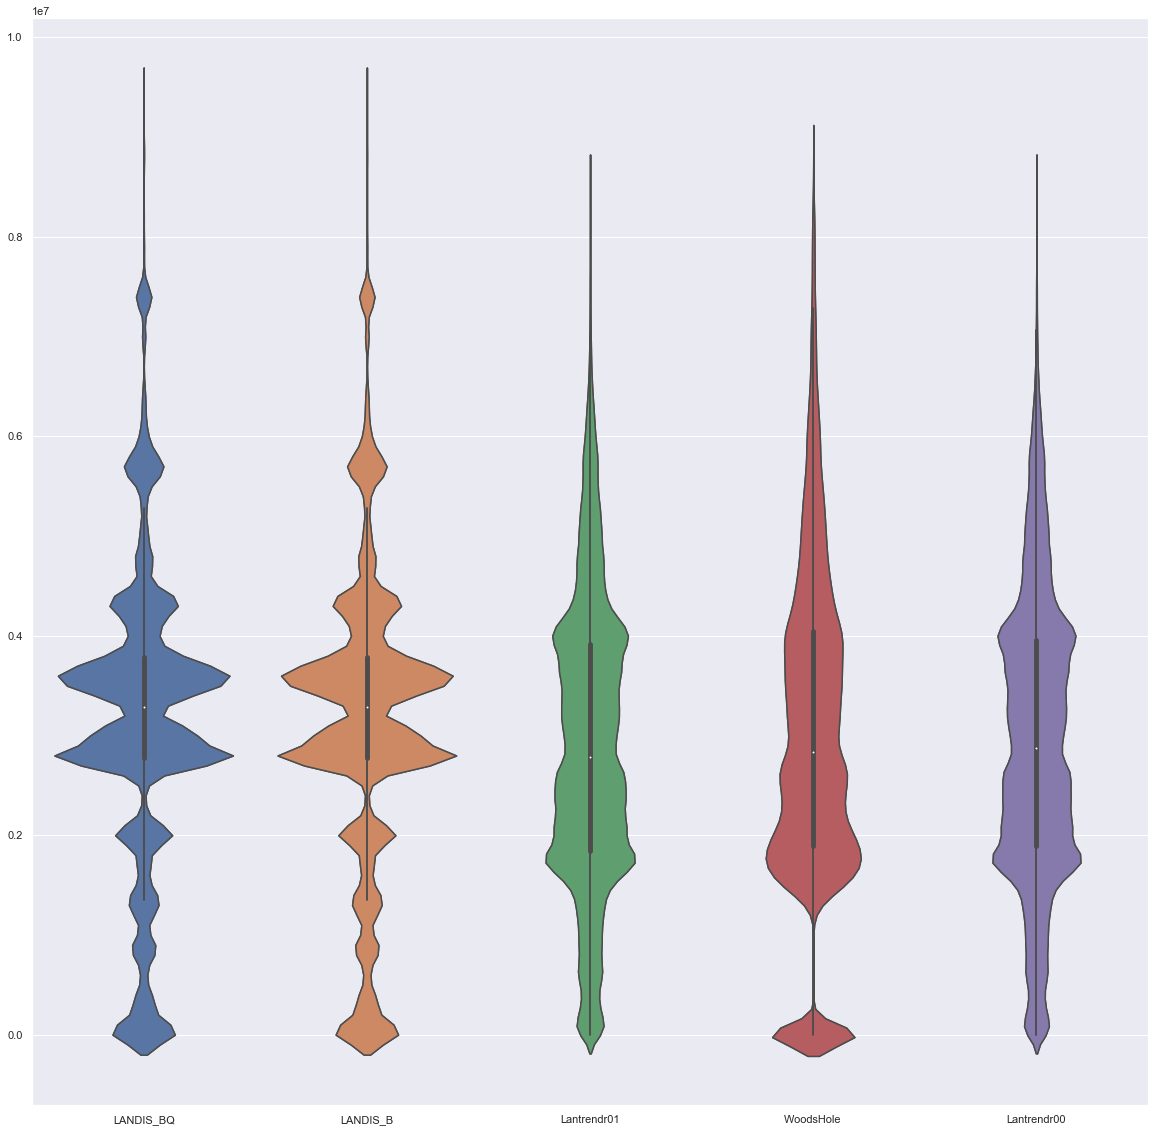

In [46]:
# Set figure size
sns.set( rc = {'figure.figsize' : ( 20, 20 ),
			'axes.labelsize' : 12 })

# Plot violin plot 1
g = sns.violinplot(
        data = df.drop(columns={'iCell'}), showmeans=False, showmedians=False,
        showextrema=False)

# Plot violin plot 2
g = sns.violinplot(
        data = df.drop(columns={'iCell'}), showmeans=True, showmedians=True,
        showextrema=True)
# Title for the complete figure
g.fig.suptitle("Above Ground Biomass Model Estimates" ,
			fontsize = 'x-large' ,
			fontweight = 'bold' )

# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.85 )

# Set x-axis and y-axis labels
g.set_axis_labels( df.keys() , "Biomass in grams of Carbon" )

# Display the figure
plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
labels = ['L_B', 'L_BQ', 'LTr', 'WH']
fig.suptitle('Above Ground Biomass Model Estimates')
#this is for the median and and extremes
#axes[0].set_title('Above Ground Biomass Model Estimates')
axes[0].set_ylabel('Biomass in grams of Carbon')
axes[0].set_xlabel('Biomass Model Name')
axes[0].violinplot(data_array)
axes[0,0].set_xticklabels(labels =labels)
#This is for a smoother image with those values
#axes[1].set_title('Above Ground Biomass Model Estimates')
sns.violinplot(ax=axes[1], data = data_array, showmeans=False, showmedians=True,
        showextrema=False)
#ax4 = g
# set style for the axes
axes[1].set_xticklabels(labels =labels)
axes[1].set_xlabel('Biomass Model Name')
#plt.subplots_adjust()
plt.show()
plt.close()

In [ ]:
sns.violinplot(
        data = data_array, showmeans=False, showmedians=True,
        showextrema=False)

In [ ]:
sns.violinplot(
        data = data_array, showmeans=True, showmedians=False,
        showextrema=False)

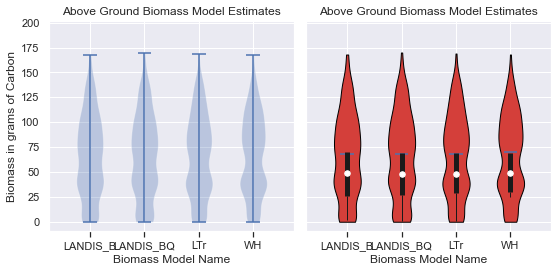

In [47]:
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
#this is for the median and and extremes
ax1.set_title('Above Ground Biomass Model Estimates')
ax1.set_ylabel('Biomass in grams of Carbon')
ax1.violinplot(data_array)
#This is for a smoother image with those values
ax3.set_title('Above Ground Biomass Model Estimates')
parts = ax3.violinplot(
        data_array, showmeans=False, showmedians=True,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data_array, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data_array, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax3.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax3.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax3.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['LANDIS_B', 'LANDIS_BQ', 'LTr', 'WH']
for ax in [ax1, ax3]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()
plt.close()
#incorrect because data_array has new name

In [ ]:
help(ax.scatter)

In [ ]:
medians